Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.


- Anomaly Detection is the process of identifying data points, events, or observations that deviate significantly from the expected behavior or normal pattern in a dataset.
These unusual points are called anomalies or outliers.

- It is widely used in fraud detection, network security, fault detection, medical diagnosis, and sensor monitoring.

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.

- Isolation Forest → Isolates anomalies quickly using random trees → best for high-dimensional large datasets.

- BSCAN → Finds dense clusters, treats sparse points as anomalies → best for spatial/geographical data.

- LOF → Compares local density of a point to its neighbors → best for contextual/density-based anomalies.

Question 3: What are the key components of a Time Series? Explain each with one
example

- Trend → Long-term direction (📈 rising global temperature).

- Seasonality → Fixed repeating pattern (🍦 ice cream sales peak in summer).

- Cyclic → Long-term, non-fixed waves (📉 economic recession & boom).

- Irregular → Random unexpected noise (🌪️ sales drop due to disaster).

Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?


- A time series is stationary if its statistical properties (mean, variance, covariance) remain constant over time.
- Stationary = mean, variance, covariance constant over time.

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.


- AR (AutoRegressive) - Future value depends on past values of the series.
- MA (Moving Average) - Future value depends on past forecast errors (shocks/noise).
- ARIMA (AutoRegressive Integrated Moving Average) - Combination of AR + Differencing (I) + MA.
- SARIMA (Seasonal ARIMA) - ARIMA extended with seasonal terms.
- SARIMAX (Seasonal ARIMA with eXogenous variables) - SARIMA + external/exogenous predictors (X).

Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [24]:
air = pd.read_csv('AirPassengers.csv')
air.Month=pd.to_datetime(air.Month)
air

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


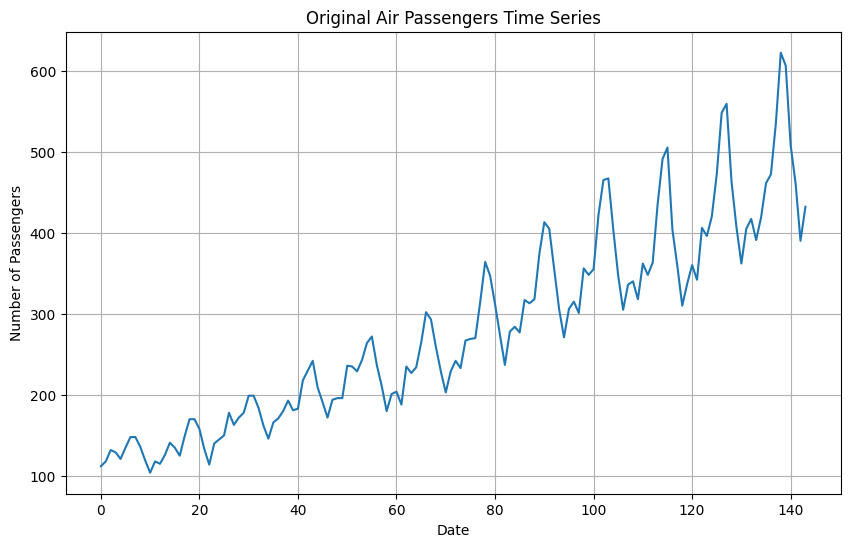

In [25]:


plt.figure(figsize=(10, 6))
plt.plot(air.Passengers)
plt.title('Original Air Passengers Time Series')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(air.Passengers, period=12)

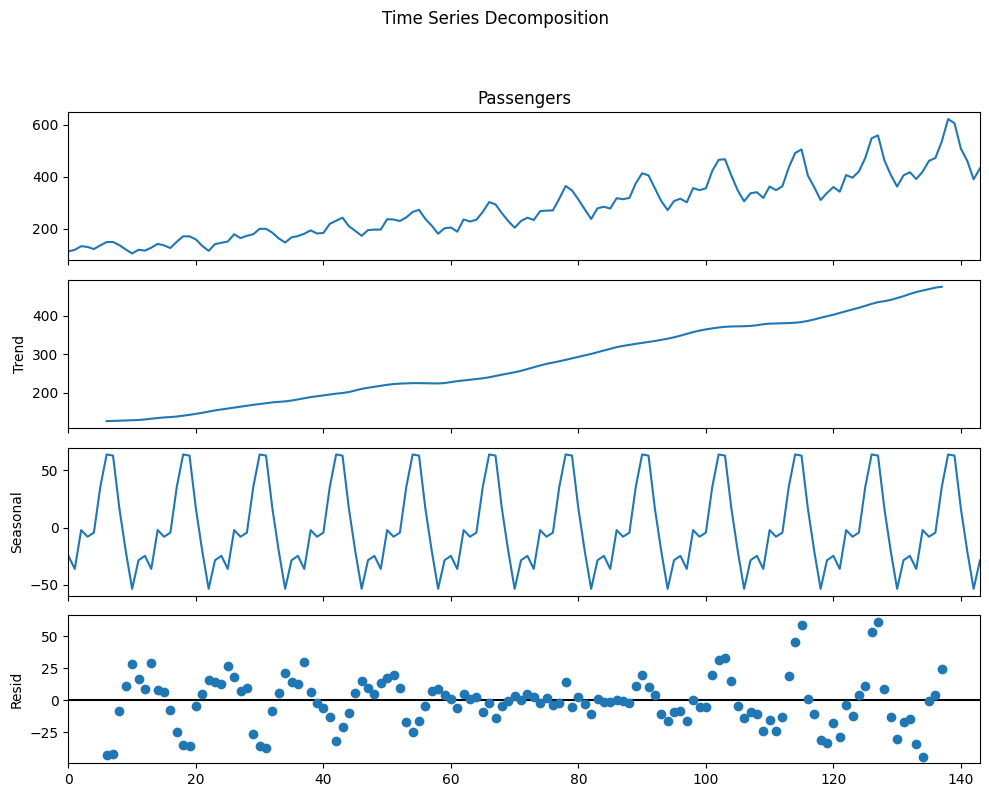

In [27]:
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.suptitle('Time Series Decomposition', y=1.02) # Adjust suptitle position
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.

In [39]:
taxi = pd.read_csv('NYC_taxi_fare_data.csv')
taxi.tpep_pickup_datetime = pd.to_datetime(taxi.tpep_pickup_datetime)
taxi.tpep_dropoff_datetime = pd.to_datetime(taxi.tpep_dropoff_datetime)
taxi

features = taxi[['fare_amount', 'trip_distance']]

In [40]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.01)

model.fit(features)

,n_estimators,100
,max_samples,'auto'
,contamination,0.01
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,None
,verbose,0
,warm_start,False


In [41]:
taxi['anomaly'] = model.predict(features)
inliers = taxi[taxi['anomaly'] == 1]
outliers = taxi[taxi['anomaly'] == -1]

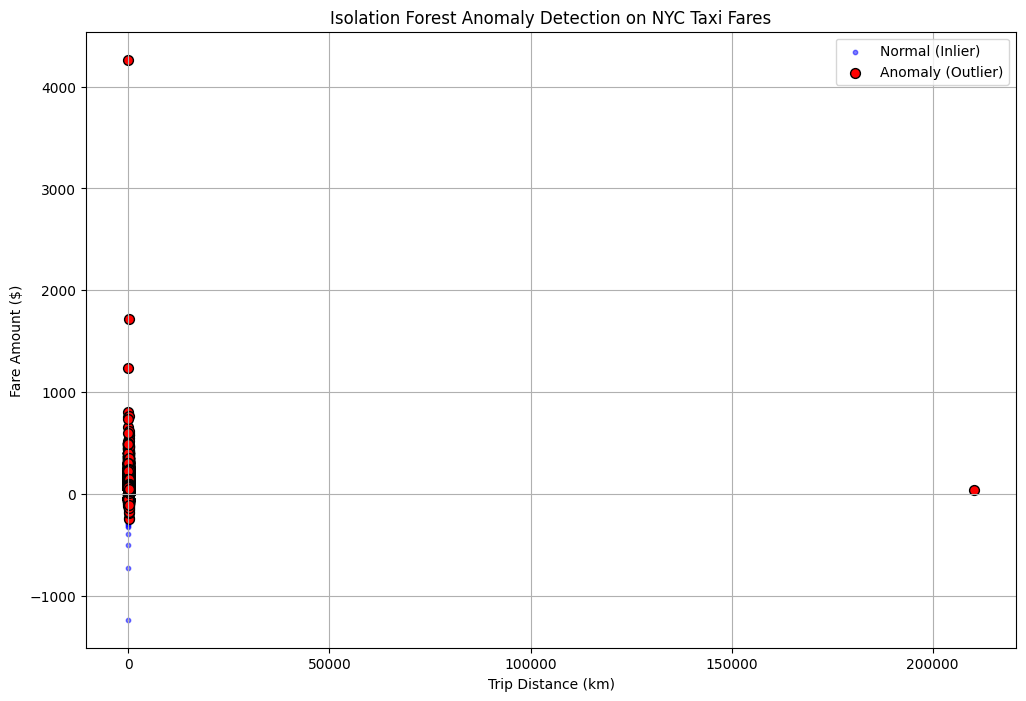

Total data points: 6405008
Number of anomalies detected: 64048


In [43]:
plt.figure(figsize=(12, 8))
plt.scatter(inliers['trip_distance'], inliers['fare_amount'], c='blue', label='Normal (Inlier)', s=10, alpha=0.5)
plt.scatter(outliers['trip_distance'], outliers['fare_amount'], c='red', label='Anomaly (Outlier)', s=50, edgecolors='k', marker='o')
plt.title('Isolation Forest Anomaly Detection on NYC Taxi Fares')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Total data points: {len(taxi)}")
print(f"Number of anomalies detected: {len(outliers)}")

Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.


In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

air = air.set_index('Month')

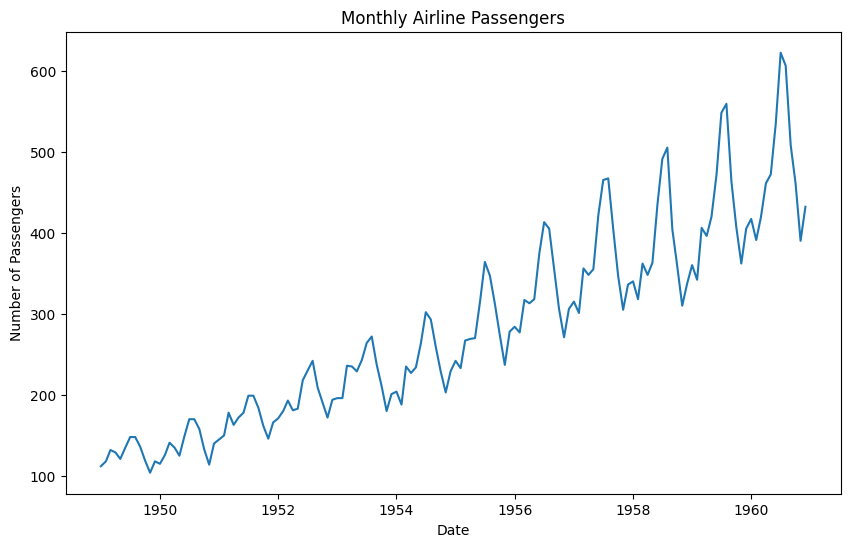

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(air['Passengers'])
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

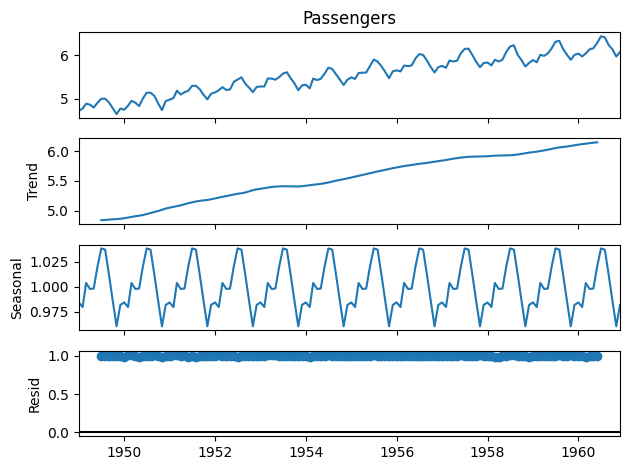

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641


In [ ]:
decomposition = seasonal_decompose(np.log(air['Passengers']), model='multiplicative', period=12)
decomposition.plot()
plt.show()

from statsmodels.tsa.stattools import adfuller  
result = adfuller(air['Passengers'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

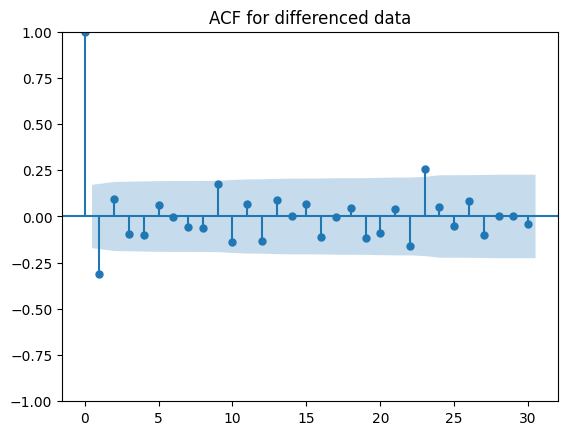

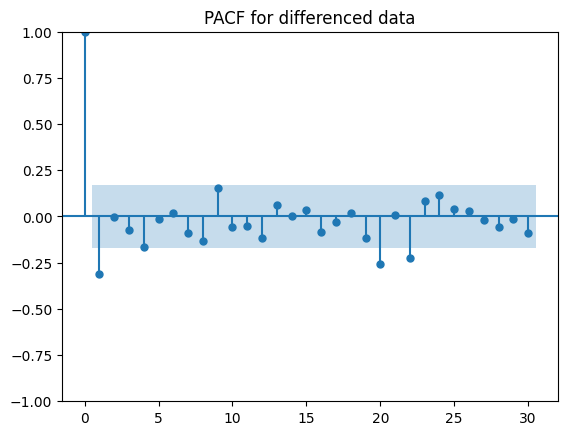

In [48]:
airpass_diff = air['Passengers'].diff().dropna()
airpass_seasonal_diff = airpass_diff.diff(periods=12).dropna()

# Plot ACF and PACF for the differenced data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(airpass_seasonal_diff, lags=30)
plt.title('ACF for differenced data')
plt.show()
plot_pacf(airpass_seasonal_diff, lags=30)
plt.title('PACF for differenced data')
plt.show()

Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib

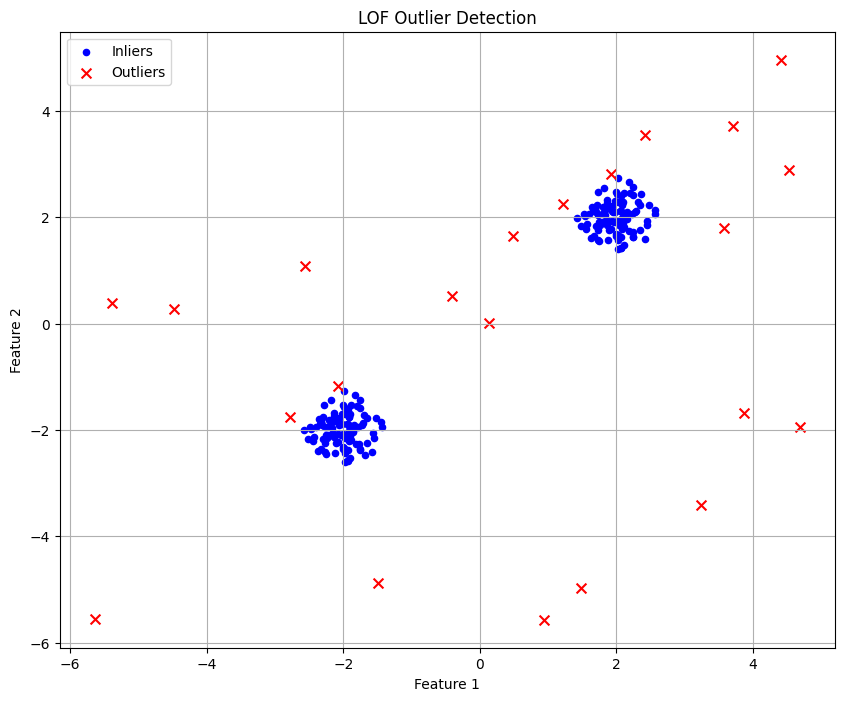

In [49]:


np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2] 

X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2)) # Generate some random outliers
X = np.r_[X_inliers, X_outliers] # Combine inliers and outliers

from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)

X_scores = clf.negative_outlier_factor_

plt.figure(figsize=(10, 8))
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], color='blue', s=20, label='Inliers')
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], color='red', s=50, marker='x', label='Outliers')
plt.title("LOF Outlier Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
- How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
- Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
- How would you validate and monitor the performance over time?
-  How would this solution help business decisions or operations?

- Anomaly Detection: Isolation Forest (fast, scalable) - spikes/drops in demand.

- Forecasting Model: SARIMAX (trend + seasonality + weather).

- Validation/Monitoring: MAE/RMSE for forecasting, Precision/Recall for anomalies, rolling monitoring.

- Business Impact: Optimize grid efficiency, cost saving, prevent outages, better planning.